Conjunto de datos de Predicción de productividad de empleados de industria texil.
* fuente : UCI Machine Learning Repository
* Tamaño : 93 kb.
* entradas : 1197
* Columnas:

 *  0 date                   1197 non-null   object
 *  1 quarter                1197 non-null   object
 *  2 department             1197 non-null   object
 *  3 day                    1197 non-null   object
 *  4 team                   1197 non-null   int64  
 *  5 targeted_productivity  1197 non-null   float64
 *  6 smv                    1197 non-null   float64
 *  7 wip                    691 non-null    float64
 *  8 over_time              1197 non-null   int64  
 *  9 incentive              1197 non-null   int64  
 * 10 idle_time              1197 non-null   float64
 * 11 idle_men               1197 non-null   int64  
 * 12 no_of_style_change     1197 non-null   int64  
 * 13 no_of_workers          1197 non-null   float64
 * 14 actual_productivity    1197 non-null   float64

In [2]:
# Se cargan las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# Se usa biblioteca google para poder usar archivos .
from google.colab import drive
# Se conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Se carga el conjunto de datos
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/selected_dataset.csv"
df = pd.read_csv(path)

#### Análisis Exploratorio de Datos (EDA) Inicial

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   int64         
 2   department             1197 non-null   object        
 3   day                    1197 non-null   int64         
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   incentive              1197 non-null   int64         
 9   no_of_workers          1197 non-null   float64       
 10  actual_productivity    1197 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 103.0+ KB


In [ ]:
df.shape

(1197, 15)

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.43,3.46,1.00,3.00,6.00,9.00,12.00
targeted_productivity,1197.0,0.73,0.10,0.07,0.70,0.75,0.80,0.80
smv,1197.0,15.06,10.94,2.90,3.94,15.26,24.26,54.56
wip,691.0,1190.47,1837.46,7.00,774.50,1039.00,1252.50,23122.00
over_time,1197.0,4567.46,3348.82,0.00,1440.00,3960.00,6960.00,25920.00
incentive,1197.0,38.21,160.18,0.00,0.00,0.00,50.00,3600.00
idle_time,1197.0,0.73,12.71,0.00,0.00,0.00,0.00,300.00
idle_men,1197.0,0.37,3.27,0.00,0.00,0.00,0.00,45.00
no_of_style_change,1197.0,0.15,0.43,0.00,0.00,0.00,0.00,2.00
no_of_workers,1197.0,34.61,22.20,2.00,9.00,34.00,57.00,89.00


#### team se ve correcta min 1 max 12 mean 6.43
wip tiene min en 7 y max en 23122
over_time tiene min 0 y max 25920
incentive sin estadistica desde min hasta el percentil 50 al igual que idle_time, idle_men, no _of_stylwe_change

In [ ]:
df.duplicated().sum()

np.int64(0)

#### Sin duplicados

In [ ]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [ ]:
df["wip"].isna().sum()

np.int64(506)

In [ ]:
df[df["wip"].isna()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
df["wip"].value_counts()

,count
wip,
1039.0,5
1282.0,4
1079.0,3
1193.0,3
1069.0,3
...,...
357.0,1
817.0,1
1576.0,1


#### Se decide imputar con el promedio de la columna wip

In [ ]:
df["wip"] = df["wip"].fillna(df["wip"].mean())

In [ ]:
df["wip"].isna().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
#  Se cambia el tipo de dato object a datetime
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [ ]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

##### Se decide pasar la columna quarter, day  a int

In [ ]:
cuart = {'Quarter1':1,
         'Quarter2':2,
         'Quarter3':3,
         'Quarter4':4,
         'Quarter5':5
         }
df["quarter"] = df["quarter"].map(cuart)

In [ ]:
df["quarter"].value_counts()

,count
quarter,
1,360
2,335
4,248
3,210
5,44


In [ ]:
df["day"].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [ ]:
dia = {'Thursday':4,
       'Saturday':6,
         'Sunday':7,
         'Monday':1,
        'Tuesday':2,
      'Wednesday':3,
       'Thursday':4,
       'Saturday':6,
         'Sunday':7
         }
df["day"] = df["day"].map(dia)

In [ ]:
df["day"].value_counts()

,count
day,
3,208
7,203
2,201
4,199
1,199
6,187


In [ ]:
df[df["no_of_style_change"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,2,finishing,3,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,2,finishing,3,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,2,finishing,3,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


#### Se decide eliminar la columna no_of_style_change teiene 1050 datos con 0 de 1197

In [ ]:
df[df["idle_men"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,2,finishing,3,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,2,finishing,3,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,2,finishing,3,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


#### Se decide eliminar la columna idle_men tiene 1179 datos en 0 de 1197

In [ ]:
df[df["idle_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,2,finishing,3,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,2,finishing,3,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,2,finishing,3,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


#### Se eliminar columna idle_time de 1197 tiene 1179 datos en 0

In [ ]:
df.drop(columns=['no_of_style_change', 'idle_men', 'idle_time'], inplace=True)

In [ ]:
df[df["incentive"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,960,0,8.0,0.886500
6,2015-01-01,1,finishing,4,2,0.75,3.94,1190.465991,960,0,8.0,0.755167
13,2015-01-01,1,finishing,4,10,0.65,3.94,1190.465991,960,0,8.0,0.705917
14,2015-01-01,1,finishing,4,8,0.75,2.90,1190.465991,960,0,8.0,0.676667
15,2015-01-01,1,finishing,4,4,0.75,3.94,1190.465991,2160,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,1190.465991,960,0,8.0,0.628333
1193,2015-03-11,2,finishing,3,8,0.70,3.90,1190.465991,960,0,8.0,0.625625
1194,2015-03-11,2,finishing,3,7,0.65,3.90,1190.465991,960,0,8.0,0.625625
1195,2015-03-11,2,finishing,3,9,0.75,2.90,1190.465991,1800,0,15.0,0.505889


In [ ]:
df[df["over_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
684,2015-02-09,2,sweing,1,11,0.75,10.05,103.000000,0,45,54.0,0.750648
694,2015-02-10,2,sweing,2,10,0.80,22.52,1268.000000,0,88,56.0,0.900632
695,2015-02-10,2,sweing,2,1,0.80,22.52,1546.000000,0,88,57.0,0.900471
696,2015-02-10,2,sweing,2,3,0.80,22.52,813.000000,0,88,57.0,0.900471
697,2015-02-10,2,sweing,2,2,0.80,22.52,1512.000000,0,88,57.0,0.899984
713,2015-02-11,2,sweing,3,2,0.80,22.52,1557.000000,0,90,57.5,1.000345
714,2015-02-11,2,sweing,3,1,0.80,22.52,1498.000000,0,113,57.0,1.000066
718,2015-02-11,2,sweing,3,10,0.80,22.52,598.000000,0,75,56.0,0.850365
730,2015-02-12,2,sweing,4,1,0.80,22.52,1397.000000,0,138,57.0,1.100484
732,2015-02-12,2,sweing,4,2,0.80,22.52,1327.000000,0,113,57.5,1.000345


In [ ]:
## Se elimina columna over_time
df.drop(columns='over_time', inplace=True)

In [ ]:
df.describe().round(2)

,date,quarter,day,team,targeted_productivity,smv,wip,incentive,no_of_workers,actual_productivity
count,1197,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00
mean,2015-02-04 10:56:50.526315776,2.40,3.81,6.43,0.73,15.06,1190.47,38.21,34.61,0.74
min,2015-01-01 00:00:00,1.00,1.00,1.00,0.07,2.90,7.00,0.00,2.00,0.23
25%,2015-01-18 00:00:00,1.00,2.00,3.00,0.70,3.94,970.00,0.00,9.00,0.65
50%,2015-02-03 00:00:00,2.00,3.00,6.00,0.75,15.26,1190.47,0.00,34.00,0.77
75%,2015-02-23 00:00:00,3.00,6.00,9.00,0.80,24.26,1190.47,50.00,57.00,0.85
max,2015-03-11 00:00:00,5.00,7.00,12.00,0.80,54.56,23122.00,3600.00,89.00,1.12
std,NaN,1.22,2.11,3.46,0.10,10.94,1395.65,160.18,22.20,0.17


In [ ]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,incentive,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,98,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,0,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,50,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,50,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,50,56.0,0.800382


In [ ]:
pmp = df["incentive"].mean().round(2)
df.loc[df["incentive"] == 0, "incentive"] = pmp

In [ ]:
df.describe().round()

#### Se crea visualizaciones para encontrar posibles outliers

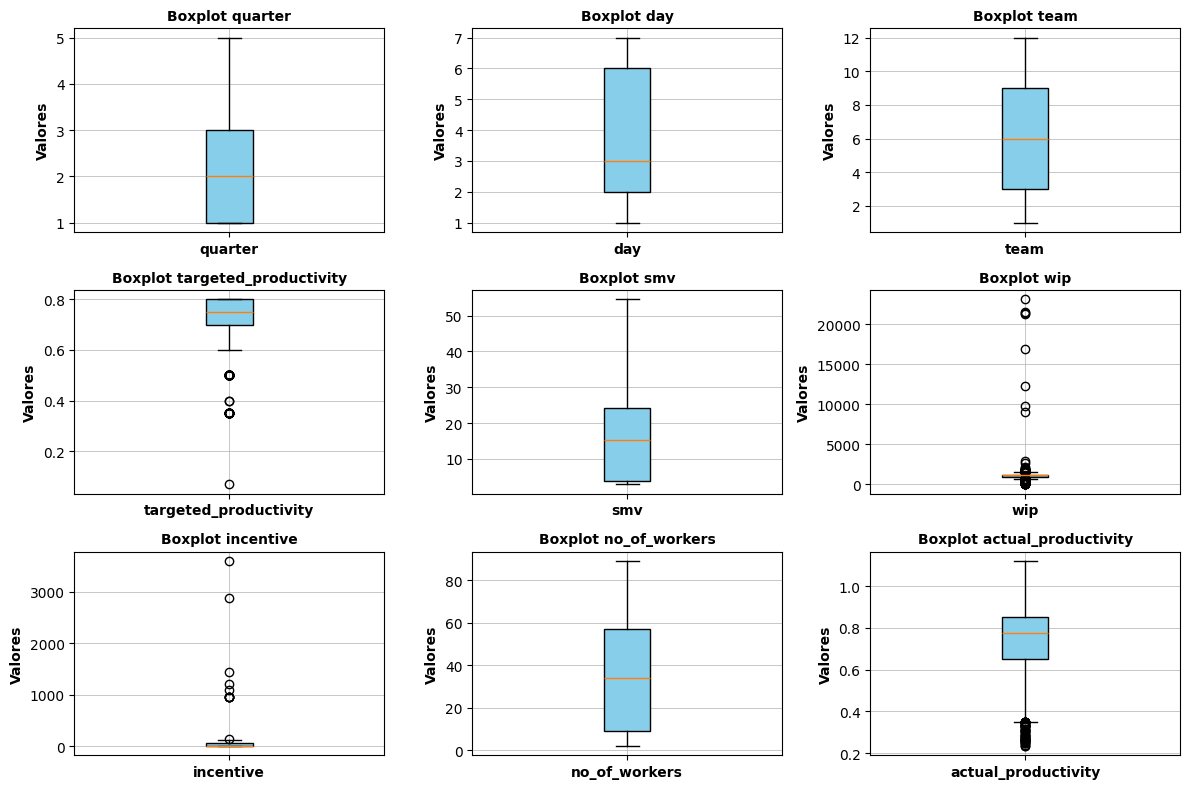

In [ ]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(3,3, figsize=(12, 8))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='skyblue')
for i, col in enumerate(numerical_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

#### La columna wip contiene datos que se escapan de la muestra, posibles outliers al igual que la columna incentive, que podrian quedar fuera de los procesos para utiizar modelos.

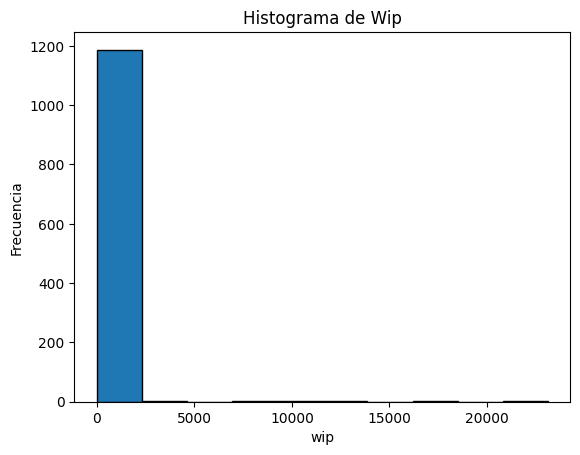

In [ ]:
# Se crea el histograma para visualizar los datos atipicos.
plt.hist(df["wip"], bins=10, edgecolor='black')
plt.title('Histograma de Wip')
plt.xlabel('wip')
plt.ylabel('Frecuencia')
plt.show()

#### Entre 0 y 250 es concentra la mayoria de los datos alcanzando una alta frecuencia.

In [ ]:
# separamos las variables en numerias y categoricas
df_numerical = df.drop(columns=['date', 'department'])

In [ ]:
# Se reviza los datos con la correlaciones de Pearson
correlation_matrix = df_numerical.corr(method='pearson')
print(correlation_matrix)

                        quarter       day      team  targeted_productivity  \
quarter                1.000000  0.061695  0.021038              -0.112319   
day                    0.061695  1.000000 -0.011927               0.029671   
team                   0.021038 -0.011927  1.000000               0.030274   
targeted_productivity -0.112319  0.029671  0.030274               1.000000   
smv                   -0.000105 -0.007079 -0.110011              -0.069489   
wip                   -0.064686 -0.104363 -0.025384               0.049114   
incentive             -0.028237 -0.105458 -0.007674               0.032768   
no_of_workers         -0.005594 -0.016574 -0.075113              -0.084288   
actual_productivity   -0.051970  0.000030 -0.148753               0.421594   

                            smv       wip  incentive  no_of_workers  \
quarter               -0.000105 -0.064686  -0.028237      -0.005594   
day                   -0.007079 -0.104363  -0.105458      -0.016574   
team  

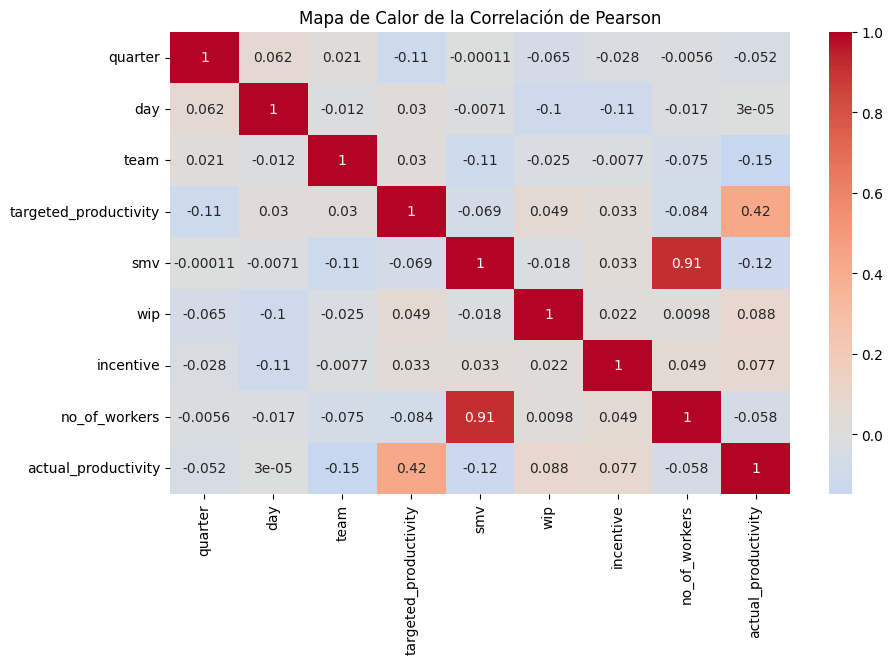

In [ ]:
# Se Crea el  mapas de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

#### Se observa en el mapa de calor que las columnas que tienen fuerte correlación, son smv con no_of_workers con 0.91.
#### Se ve una correlacion moderada entre actual _productivy y target_productivity con 0.42.
#### Las otras correlaciones son debiles o insignificantes.


#### Se tomara el Eda de productividad, para aplicarlo a un modelo de Regresion binaria. A partir de esta data que tiene la productividad de empleados de la industria textil, prediciremos la productividad de los empleados. los demas Edas, tambien son interesantes, pero pueden servir en una practica posterior.   

Se Aplica el modelos de

#### Se aplica el modelo RandomForestRegressor a la muestra, por ser mas eficiente.

### No se pasaran las columnas incentive, wip y date. por tener datos fuera de la distribucion de la mayoria

In [ ]:
# separamos las variables en numerias y categoricas
df_numerical = df.drop(columns=['date', 'department'])
num_cols = ['quarter', 'day',	'team',	'smv', 'no_of_workers', 'actual_productivity']
cat_cols = ['department']

In [ ]:
X = df.drop(columns=['targeted_productivity', 'incentive','date'])
y = df['targeted_productivity']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba con variables numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocesador Random forest.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", 'passthrough', num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

# Modelo Randm forest.
pipeline_forest = Pipeline([
    ("forest", preprocessor_forest),
    ("modeloforest", RandomForestRegressor())
])

In [ ]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('forest',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['quarter', 'day', 'team',
                                                   'smv', 'no_of_workers',
                                                   'actual_productivity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['department'])])),
                ('modeloforest', RandomForestRegressor())])

In [ ]:
# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

In [ ]:
# Evaluación
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_score_forest = r2_score(y_test, y_pred_forest)
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_forest}')
print(f'R-cuadrado: {r2_score_forest}')


RandomForestRegressor
Error Cuadrático Medio: 0.004299888916666676
R-cuadrado: 0.4012303004442286


### Se utiliza Gridsearch para optimizar los parametros del modelo

In [ ]:
# Optimizacion de hiperparametros.
forest_params = {
    "modeloforest__n_estimators": [50, 100, 200] # El nombre debe coincidir con el nombre del modelo.
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=3, scoring="r2", n_jobs=-1)
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('forest',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['quarter',
                                                                          'day',
                                                                          'team',
                                                                          'smv',
                                                                          'no_of_workers',
                                                                          'actual_productivity']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['department'])])),
                                       ('modeloforest',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'modeloforest__n_estimators': [50, 100, 200]},
             scoring='r2')

In [ ]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)

print("Forest Regressor")
print("Mejores parámetros:", forest_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_forest))

Forest Regressor
Mejores parámetros: {'modeloforest__n_estimators': 200}
R²: 0.38394495663473416


### Modelo  RandomForestRegressor con los parametros optimizados

In [ ]:
# Preprocesador Random forest.
preprocessor_forest2 = ColumnTransformer(transformers=[
    ("num2", 'passthrough', num_cols),
    ("cat2", OneHotEncoder(), cat_cols)
])

# Modelo Randm forest.
pipeline_forest2 = Pipeline([
    ("forest2", preprocessor_forest2),
    ("modeloforest2", RandomForestRegressor(n_estimators=200))
])


In [ ]:
# Entrenamiento.
pipeline_forest2.fit(X_train, y_train)

Pipeline(steps=[('forest2',
                 ColumnTransformer(transformers=[('num2', 'passthrough',
                                                  ['quarter', 'day', 'team',
                                                   'smv', 'no_of_workers',
                                                   'actual_productivity']),
                                                 ('cat2', OneHotEncoder(),
                                                  ['department'])])),
                ('modeloforest2', RandomForestRegressor(n_estimators=200))])

In [ ]:
# Prediccion.
y_pred_forest2 = pipeline_forest2.predict(X_test)

In [ ]:
# Evaluación
mse_forest2 = mean_squared_error(y_test, y_pred_forest2)
r2_score_forest2 = r2_score(y_test, y_pred_forest2)
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_forest2}')
print(f'R-cuadrado: {r2_score_forest2}')


RandomForestRegressor
Error Cuadrático Medio: 0.004383132062500004
R-cuadrado: 0.38963849554259444


In [ ]:
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_score_forest = r2_score(y_test, y_pred_forest)
mse_forest2 = mean_squared_error(y_test, y_pred_forest2)
r2_score_forest2 = r2_score(y_test, y_pred_forest2)
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_forest:.2f}')
print(f'R-cuadrado: {r2_score_forest:.2f}')
print(f'\nRandomForestRegressor n_estimators 200')
print(f'Error Cuadrático Medio: {mse_forest2:.2f}')
print(f'R-cuadrado: {r2_score_forest2:.2f}')


RandomForestRegressor
Error Cuadrático Medio: 0.00
R-cuadrado: 0.38

RandomForestRegressor n_estimators 200
Error Cuadrático Medio: 0.00
R-cuadrado: 0.39


#### En conclusión al optimizar el parametro n_estimators a 200, se dio una leve mejoria en la eficiencia del Modelo, pero no fue sustancial, Se deberia aplicar otros parametros para obtener un mejor resultado. Se debeiaqdar con el modelo de la primera instancia que dio mejor resultado, pero leve.

#### Especificación de los cuatro dataset trbajados;
 * El dataset 1 corresponde a datos del servicio de la empresa Netflix, el objetico es saber la durabilidad de sus clientes en el servico.
 * El dataset 2 corresponde a la venta de comercio electronico de una empresa.
 * El datase3 3 esta ligado al trabajo remoto en tiempo de pandemia, el cual muestra las complicaciones.
 * El dataset 4 corresponde al conjunto de datos de sueldo de trabajadores de ciencia de datos.
 ### La eleccion fue el dataset que predice la productividad de   el trabajo de una empresa textil.